In [1]:
import pandas as pd;
import numpy as np;
import tensorflow as tf;

In [2]:
from tensorflow.keras import Sequential;
from tensorflow.keras.layers import Dense, Dropout, InputLayer, Flatten, LSTM;
from tensorflow.keras.optimizers import Adam;
from tensorflow.keras.losses import MeanSquaredError;
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError, RootMeanSquaredError;


In [3]:
df = pd.read_csv('WeatherData/Quezon City Weather Data.csv')
df.tail()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
5211,"Quezon City, National Capital Region, Philippines",2025-04-08,34.0,27.9,30.7,40.5,31.0,35.6,23.6,66.7,...,12.1,7,30.0,2025-04-08T05:46:41,2025-04-08T18:08:58,0.33,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"RPLC,RPLL,E0758"
5212,"Quezon City, National Capital Region, Philippines",2025-04-09,34.9,27.9,31.0,40.5,31.0,35.0,22.7,62.5,...,13.9,6,30.0,2025-04-09T05:46:00,2025-04-09T18:09:06,0.37,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"RPLC,RPLL,E0758"
5213,"Quezon City, National Capital Region, Philippines",2025-04-10,35.9,26.9,30.8,42.7,29.1,35.1,22.9,64.3,...,16.9,6,30.0,2025-04-10T05:45:20,2025-04-10T18:09:13,0.40,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"RPLC,RPLL,E0758"
5214,"Quezon City, National Capital Region, Philippines",2025-04-11,35.0,28.8,31.3,41.6,34.0,37.0,24.3,67.3,...,14.4,6,30.0,2025-04-11T05:44:40,2025-04-11T18:09:21,0.44,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"RPLC,RPLL,E0758"
5215,"Quezon City, National Capital Region, Philippines",2025-04-12,36.5,27.9,31.3,41.6,30.5,35.2,22.4,60.5,...,17.9,8,30.0,2025-04-12T05:44:01,2025-04-12T18:09:30,0.47,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"RPLC,RPLL,E0758"


In [4]:
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed')
df.tail()
print(df['datetime'].dtype)
df.to_csv('WeatherData/Quezon City Weather Data.csv', index=False, date_format='%Y-%m-%d')

datetime64[ns]


In [5]:
df = pd.read_csv('WeatherData/Quezon City Weather Data.csv')
df.tail()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
5211,"Quezon City, National Capital Region, Philippines",2025-04-08,34.0,27.9,30.7,40.5,31.0,35.6,23.6,66.7,...,12.1,7,30.0,2025-04-08T05:46:41,2025-04-08T18:08:58,0.33,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"RPLC,RPLL,E0758"
5212,"Quezon City, National Capital Region, Philippines",2025-04-09,34.9,27.9,31.0,40.5,31.0,35.0,22.7,62.5,...,13.9,6,30.0,2025-04-09T05:46:00,2025-04-09T18:09:06,0.37,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"RPLC,RPLL,E0758"
5213,"Quezon City, National Capital Region, Philippines",2025-04-10,35.9,26.9,30.8,42.7,29.1,35.1,22.9,64.3,...,16.9,6,30.0,2025-04-10T05:45:20,2025-04-10T18:09:13,0.40,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"RPLC,RPLL,E0758"
5214,"Quezon City, National Capital Region, Philippines",2025-04-11,35.0,28.8,31.3,41.6,34.0,37.0,24.3,67.3,...,14.4,6,30.0,2025-04-11T05:44:40,2025-04-11T18:09:21,0.44,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"RPLC,RPLL,E0758"
5215,"Quezon City, National Capital Region, Philippines",2025-04-12,36.5,27.9,31.3,41.6,30.5,35.2,22.4,60.5,...,17.9,8,30.0,2025-04-12T05:44:01,2025-04-12T18:09:30,0.47,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"RPLC,RPLL,E0758"


In [6]:
new_df = df.copy()
new_df['datetime'] = pd.to_datetime(new_df['datetime'])
new_df.set_index('datetime', inplace=True)
new_df.tail()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2025-04-08,"Quezon City, National Capital Region, Philippines",34.0,27.9,30.7,40.5,31.0,35.6,23.6,66.7,0.0,...,12.1,7,30.0,2025-04-08T05:46:41,2025-04-08T18:08:58,0.33,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"RPLC,RPLL,E0758"
2025-04-09,"Quezon City, National Capital Region, Philippines",34.9,27.9,31.0,40.5,31.0,35.0,22.7,62.5,0.1,...,13.9,6,30.0,2025-04-09T05:46:00,2025-04-09T18:09:06,0.37,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"RPLC,RPLL,E0758"
2025-04-10,"Quezon City, National Capital Region, Philippines",35.9,26.9,30.8,42.7,29.1,35.1,22.9,64.3,0.7,...,16.9,6,30.0,2025-04-10T05:45:20,2025-04-10T18:09:13,0.40,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"RPLC,RPLL,E0758"
2025-04-11,"Quezon City, National Capital Region, Philippines",35.0,28.8,31.3,41.6,34.0,37.0,24.3,67.3,0.3,...,14.4,6,30.0,2025-04-11T05:44:40,2025-04-11T18:09:21,0.44,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"RPLC,RPLL,E0758"
2025-04-12,"Quezon City, National Capital Region, Philippines",36.5,27.9,31.3,41.6,30.5,35.2,22.4,60.5,0.0,...,17.9,8,30.0,2025-04-12T05:44:01,2025-04-12T18:09:30,0.47,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"RPLC,RPLL,E0758"


In [7]:
new_df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2025-04-03', '2025-04-04', '2025-04-05', '2025-04-06',
               '2025-04-07', '2025-04-08', '2025-04-09', '2025-04-10',
               '2025-04-11', '2025-04-12'],
              dtype='datetime64[ns]', name='datetime', length=5216, freq=None)

In [8]:
new_df.apply(pd.isnull).sum() / new_df.shape[0]
new_df = new_df.fillna(method='ffill')

C:\Users\User\AppData\Local\Temp\ipykernel_9452\3626438343.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_df = new_df.fillna(method='ffill')


In [9]:
new_df.apply(pd.isnull).sum() / new_df.shape[0]

name                0.000000
tempmax             0.000000
tempmin             0.000000
temp                0.000000
feelslikemax        0.000000
feelslikemin        0.000000
feelslike           0.000000
dew                 0.000000
humidity            0.000000
precip              0.000000
precipprob          0.000000
precipcover         0.000000
preciptype          0.000000
snow                0.280100
snowdepth           0.280100
windgust            0.000000
windspeed           0.000000
winddir             0.000000
sealevelpressure    0.000000
cloudcover          0.000000
visibility          0.000000
solarradiation      0.000000
solarenergy         0.000000
uvindex             0.000000
severerisk          0.840299
sunrise             0.000000
sunset              0.000000
moonphase           0.000000
conditions          0.000000
description         0.000000
icon                0.000000
stations            0.000000
dtype: float64

In [10]:
new_df = new_df[['tempmin', 'tempmax', 'temp', 'humidity', 'precip', 'windgust']].copy()
new_df.tail()


,tempmin,tempmax,temp,humidity,precip,windgust
datetime,,,,,,
2025-04-08,27.9,34.0,30.7,66.7,0.0,33.5
2025-04-09,27.9,34.9,31.0,62.5,0.1,31.7
2025-04-10,26.9,35.9,30.8,64.3,0.7,22.3
2025-04-11,28.8,35.0,31.3,67.3,0.3,18.4
2025-04-12,27.9,36.5,31.3,60.5,0.0,20.5


In [11]:
some_data = new_df['temp']
some_data

datetime
2011-01-01    25.2
2011-01-02    25.3
2011-01-03    25.7
2011-01-04    25.1
2011-01-05    25.4
              ... 
2025-04-08    30.7
2025-04-09    31.0
2025-04-10    30.8
2025-04-11    31.3
2025-04-12    31.3
Name: temp, Length: 5216, dtype: float64

In [12]:
def df_to_X_y(some_data, window_size=7):
    cw_as_np = some_data.to_numpy()
    X = []
    y = []
    for i in range(len(cw_as_np) - window_size):
        row = [[a] for a in cw_as_np[i:i + window_size]]
        X.append(row)
        label = cw_as_np[i + window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [13]:
WINDOW_SIZE = 7;
X1, y1 = df_to_X_y(some_data, WINDOW_SIZE);
X1.shape, y1.shape

((5209, 7, 1), (5209,))

In [60]:
def get_data_points(X1, y1):
    
    total_samples = len(X1)
    
    return total_samples

In [61]:
total_samples = get_data_points(X1, y1)
total_samples

5209

In [62]:
X_train1, y_train1 = X1[:total_samples], y1[:total_samples]
X_val1, y_val1 = X1[1:total_samples], y1[1:total_samples]
X_test1, y_test1 = X1[total_samples:], y1[total_samples:]

X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((5209, 7, 1), (5209,), (5208, 7, 1), (5208,), (0, 7, 1), (0,))

In [63]:
model = Sequential([
    InputLayer((WINDOW_SIZE, 1)),
    LSTM(128, return_sequences=True),
    LSTM(128, return_sequences=False),
    Dense(64, 'relu'),
    Dense(64, 'relu'),
    Dense(1, 'linear')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 210,625 (822.75 KB)

 Trainable params: 210,625 (822.75 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
import os

folder_path = "weatherModels"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

model_count = len([name for name in os.listdir(folder_path) if name.startswith('model')])

model_name = f"{folder_path}/model{model_count + 1}.keras"
print(f"Saving as : {model_name}")

Saving as : weatherModels/model3.keras


In [65]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
cp1 = ModelCheckpoint(model_name, save_best_only=True, monitor='val_loss', mode='min')
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [66]:
model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=25 ,batch_size=30, callbacks=[cp1, early_stopping])

Epoch 1/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - loss: 213.2861 - root_mean_squared_error: 13.4874 - val_loss: 2.2292 - val_root_mean_squared_error: 1.4930
Epoch 2/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 2.2875 - root_mean_squared_error: 1.5124 - val_loss: 2.2329 - val_root_mean_squared_error: 1.4943
Epoch 3/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 2.2006 - root_mean_squared_error: 1.4832 - val_loss: 2.2124 - val_root_mean_squared_error: 1.4874
Epoch 4/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 2.1675 - root_mean_squared_error: 1.4719 - val_loss: 2.1432 - val_root_mean_squared_error: 1.4640
Epoch 5/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 2.0795 - root_mean_squared_error: 1.4419 - val_loss: 1.4922 - val_root_mean_squared_error: 1.2215
Epoch 6/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 1.3981 - root_mean_squared_error: 1.1814 - val_loss: 0.9144 - val_root_mean_squared_error: 0.9562
Epoch 7/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 6s

In [70]:
from tensorflow.keras.models import load_model
qc_model = load_model('weatherModels/model3.keras')

163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


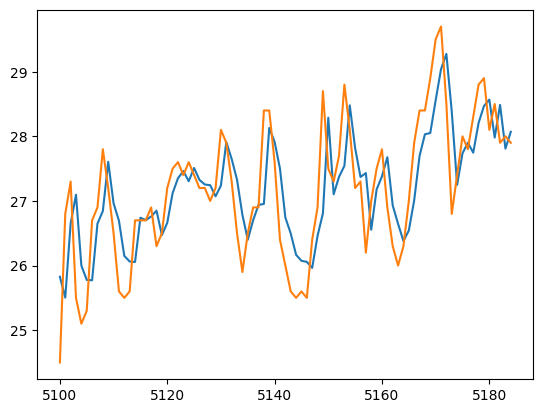

In [71]:
train_predictions = qc_model.predict(X_train1)
train_predictions = train_predictions.flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Train Actual': y_train1})

import matplotlib.pyplot as plt

plt.plot(train_results['Train Predictions'][5100:5185], label='Train Predictions')
plt.plot(train_results['Train Actual'][5100:5185], label='Train Actual')
plt.legend
plt.show()

In [76]:
print(train_results['Train Predictions'][5100:5217])
print(train_results['Train Actual'][5100:5217])
train_results.count()

5100    25.826571
5101    25.503643
5102    26.649643
5103    27.095726
5104    25.999601
          ...    
5204    30.286955
5205    30.290562
5206    30.558043
5207    30.463074
5208    30.820343
Name: Train Predictions, Length: 109, dtype: float32
5100    24.5
5101    26.8
5102    27.3
5103    25.5
5104    25.1
        ... 
5204    30.7
5205    31.0
5206    30.8
5207    31.3
5208    31.3
Name: Train Actual, Length: 109, dtype: float64


Train Predictions    5209
Train Actual         5209
dtype: int64